# Logistic Regression Scratch Implementation Preview

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. [statisticsolutions](https://www.statisticssolutions.com/what-is-logistic-regression/)

<img src="images/LR.png" style="width:450px;height:300px;">

To give a quick preview of how the logistic regression algorithm works we will be making some imports which includes: 

- The `sklearn.datasets` used to import necessary data to test and observe the behaviour of the algorithm.
- The `matplotlib.pyplot` used to visualize the data structures and scan for *linearity* in the data, as will be seen later in this presentation.
- The `logistic_regression.LogisticRegression` which is the Logistic Regression class implemented in `logistic_regression.py`. which contains all the necessary functions needed to carry out the operations.

**Note** This notebook was created to evaluate the Logistic Regression algorithm implemented at [logistic_regression.py](logistic_regression.py)


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from logistic_regression import LogisticRegression as LR

### The Iris Data-Set

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [2]:
iris = datasets.load_iris()

### Data Analysis

To analyse the data, we'll be loading all the iris dataset into it's `X` & `y` variables each.

In [3]:
X, y = iris.data, iris.target

The relationship between the Setosa, Versicolour, and Virginica sepal length

For the sake of simplicity we'll be using only the Sepal Length and Sepal Width columns to plot the relationship between all 3 different types of irises

The **Setosa** labelled **blue** 

The **Versicolour** labelled **red** 

The **Virginica** labelled **green** 

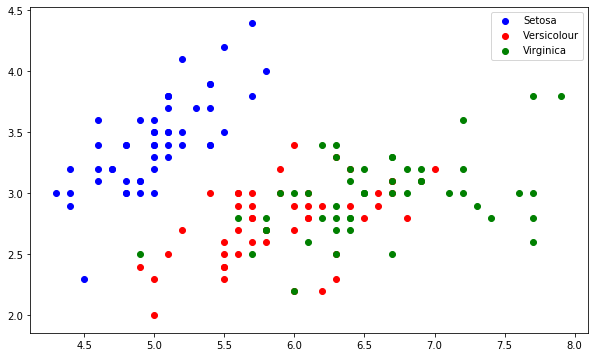

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:50, :1], X[:50, 1:2], color='b', label='Setosa')
plt.scatter(X[50:100, :1], X[50:100, 1:2], color='r', label='Versicolour')
plt.scatter(X[100:150, :1], X[100:150, 1:2], color='g', label='Virginica')
plt.legend()
plt.show()

### Binary Classification

Given that logistic regression is a binary classification task, we have to select two out of the three irises that can be perfect for classification

From the plot **above** we tell the **Setosa** iris is distinct unlike the rough mixture between the **Versicolour** and **Virginica** irises. So either of both the **Versicolour** and **Virginica** irises could be selected

Thus, our choice for this preview would be the **Setosa** and **Versicolour** irises

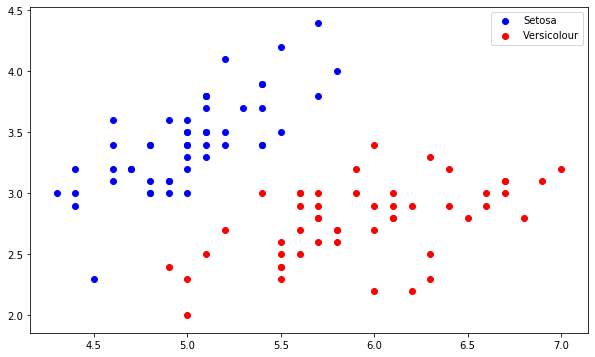

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:50, :1], X[:50, 1:2], color='b', label='Setosa')
plt.scatter(X[50:100, :1], X[50:100, 1:2], color='r', label='Versicolour')
plt.legend()
plt.show()

**Now**, structuring the data accordingly!

In [6]:
X = iris.data[:100, :2]
y = iris.target.reshape(150, 1)[:100, :]

### Initializing The Logistic Regression Model

```python
class LogisticRegression:
    def __init__(self, x, y, alpha=0.01, num_iter=1000, verbose=False, lambd=0.0):
```


At initilization of the Linear Regression model:
- `x` will be the input feature which should be a ($X^{[m]}$, n) matrix.
- `y` will be the target feature which should be a ($Y^{[m]}$, 1) matrix.

`alpha` is the learning rate and `num_iter` the number of iterations used in gradient descent. `verbose` if True will produce the detailed output of the cost function for diagnostic purposes, and `lambd` is the parameter used to perform regularization (L2 Regularization) on the model, it is of no effect if `lambd` is set to 0.0.

**Note** "$m$" is the number of training examples and "$n$" is the number of features.

In [7]:
model = LR(X, y, verbose=True)

We the perform a split operation on the datasets using the builtin method `split_data()`.

At default it sets the training data to 80% and the test data at 20% and this could be altered by re-setting `split_data()`.

```python
def split_data(self, train_size=0.8, test_size=0.2, shuffle=True):
    pass
```

In [8]:
model.split_data()

### Fitting The Model

```python
def fit(timeit=True, count_at=100):
    pass
```

The argument `timeit` time's how long it takes to train the model and the `count_at` produces the cost function and value of theta at every 100 iteration (default).

In [9]:
model.fit(count_at=200)

cost 1: 0.6931471805599453, theta: [[ 0.000125  ]
 [ 0.00298125]
 [-0.0012125 ]]
cost 201: 0.5814719847524366, theta: [[-0.03269633]
 [ 0.25145785]
 [-0.39646684]]
cost 401: 0.5000734953466291, theta: [[-0.06469203]
 [ 0.45286584]
 [-0.74395158]]
cost 601: 0.43858510276013457, theta: [[-0.0937233 ]
 [ 0.6283167 ]
 [-1.04568166]]
cost 801: 0.39110787722576823, theta: [[-0.12031784]
 [ 0.78277115]
 [-1.31060139]]
Ran in 0.31secs


After fitting the model we can check for it's assumed accuracy from training and testing

In [10]:
model.accuracy()

100.0

**Now** to show the boundary between both irises.

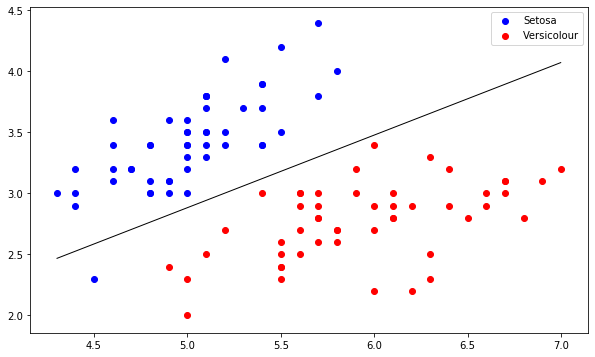

In [11]:
model.plot_boundary(label_1='Setosa', label_2='Versicolour')